## Lectura Montana

Lectura de los archivos de reviews de Montana

In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Montana. Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Montana/1.json', lines= True)
df_2 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Montana/2.json', lines= True)
df_3 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Montana/3.json', lines= True)
df_4 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Montana/4.json', lines= True)
df_5 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Montana/5.json', lines= True)
df_6 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Montana/6.json', lines= True)
df_7 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Montana/7.json', lines= True)


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 8):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Montana = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros

reviews_Montana.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.147715e+20,Shifts and giggles,1618975510300,5,Good people that know thier stuff excellent cu...,None,None,0x535e9ec3ce050deb:0x2169887374ce879f
1,1.005777e+20,Craig Thomas,1609450506236,5,Fixed my saw bout 10min.\n\n1st class.,None,None,0x535e9ec3ce050deb:0x2169887374ce879f
2,1.052042e+20,Lance Broshar,1595447399474,5,Excellent service and products. Fair and reaso...,None,None,0x535e9ec3ce050deb:0x2169887374ce879f


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Montana.shape

(950370, 8)

In [6]:
# Miro el tipo de información

reviews_Montana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950370 entries, 0 to 950369
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  950370 non-null  float64
 1   name     950370 non-null  object 
 2   time     950370 non-null  int64  
 3   rating   950370 non-null  int64  
 4   text     531657 non-null  object 
 5   pics     20730 non-null   object 
 6   resp     109485 non-null  object 
 7   gmap_id  950370 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 58.0+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls = pd.DataFrame(reviews_Montana.isnull().sum().sort_values(ascending = False))
nulls["Porcentaje de nulos"] = round(nulls/reviews_Montana.shape[0]*100,2)
nulls.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,929640,97.82
resp,840885,88.48
text,418713,44.06
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
reviews_Montana.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [9]:
reviews_Montana.user_id.nunique()

34896

En el estado de Montana, tenemos 34896 usuarios que emitieron 950 K de reseñas.

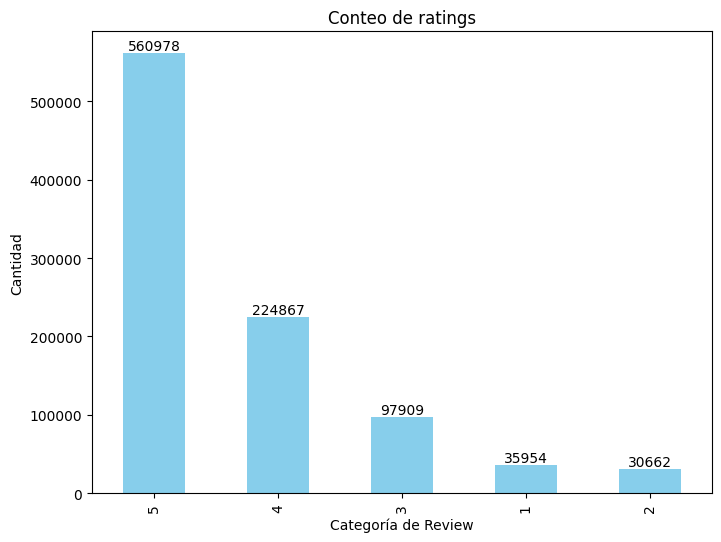

In [10]:
rating = reviews_Montana.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [11]:
reviews_Montana['time'] = pd.to_datetime(reviews_Montana['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [12]:
reviews_Montana['time'] = pd.to_datetime(reviews_Montana['time'], format='%d/%m/%Y')

reviews_Montana['year'] = reviews_Montana['time'].dt.year

In [13]:
min_date = reviews_Montana.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2008-01-17 00:00:00
2008-01-17 00:00:00


In [14]:
max_date = reviews_Montana.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-07 00:00:00
2021-09-07 00:00:00


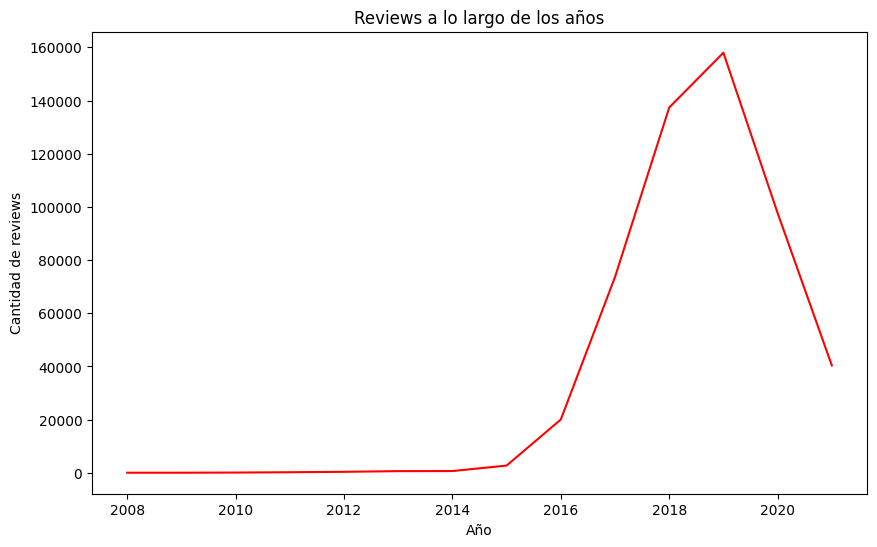

In [15]:
conteo_por_año= reviews_Montana[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [16]:
reviews_Montana["text"] = reviews_Montana["text"].astype(str)
reviews_Montana.dropna(subset=["text"], inplace=True)

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


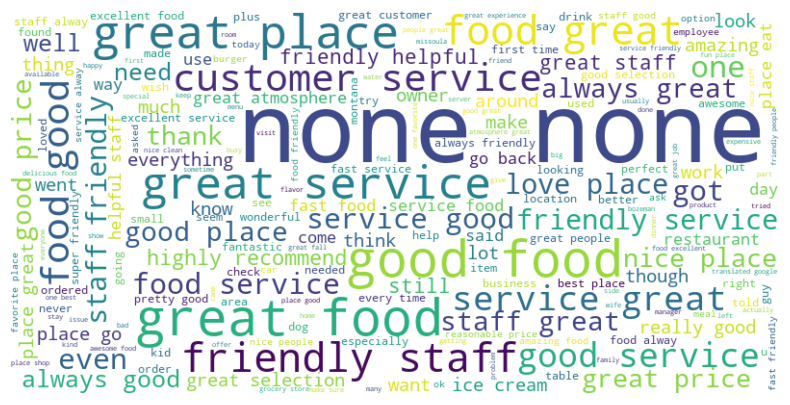

In [18]:
texto = " ".join(reviews_Montana["text"])

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

texto_procesado = " ".join(words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
